# 컴퓨터 비전을 위한 딥러닝
## 합성곱 신경망(Convolutional Neural Network, CNN)

In [1]:
# 간단한 CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1))) # img_height, img_width, img_channels
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

c:\Users\spec3\anaconda3\envs\tfpy\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [3]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf

(train_imgs, trian_labels), (test_imgs, test_labels) = mnist.load_data()

train_imgs = train_imgs.reshape((60000, 28, 28, 1))
train_imgs = train_imgs.astype("float32")/255

test_imgs = test_imgs.reshape((10000, 28, 28, 1))
test_imgs = test_imgs.astype("float32")/255

trian_labels = tf.keras.utils.to_categorical(trian_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [4]:
model.compile(
    optimizer = "rmsprop",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [5]:
with tf.device(":/GPU:0"):
    hist = model.fit(train_imgs, trian_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 18s 19ms/step - loss: 0.1717 - accuracy: 0.9466
Epoch 2/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0466 - accuracy: 0.9854
Epoch 3/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0311 - accuracy: 0.9906
Epoch 4/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0234 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0179 - accuracy: 0.9946


In [6]:
test_loss, test_acc = model.evaluate(test_imgs, test_labels)
test_acc

313/313 [==============================] - 1s 3ms/step - loss: 0.0327 - accuracy: 0.9907


0.9907000064849854

### 합성곱 연산
Dense(FC, 완전 연결층) 층은 입력 특성 공간에 있는 전역 패턴을 학습하지만 Conv(합성곱 층) 층은 지역 패턴을 학습함  
- 학습된 패턴은 평행 이동 불변성(translate invariant)을 가짐  
- 패턴의 공간적 계측 구조를 학습할 수 있음  

합성곱 연산은 **특성 맵(feature map)** 이라고 부르는 3D 텐서에 적용  
-> 특성 맵에서 작은 패치(patch)들을 추출  
-> 변환을 적용해 **출력 특성 맵(ouput feature map)** 을 만듬

- 입력으로부터 뽑아낼 패치의 크기(필터 사이즈)
- 특성 맵의 출력 깊이(필터의 수)

```python
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
```
해당 부분은, (28, 28, 1) 크기의 특성 맵을 입력으로 받아 (26, 26, 32) 크기의 특성 맵(응답 맵(response map))을 출력 -> 입력에 대해 32개의 필터를 적용

#### 패딩(padding)과 스트라이드(stride)

#### 최대 풀링 연산(MaxPooling2D)
스트라이드 합성곱과 유사하게 특성 맵을 다운 샘플링

## 소규모 데이터셋에서 밑바닥부터 컨브넷(CNN) 훈련하기
[데이터셋 | Dogs vs Cats datasets](https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset)  

In [12]:
import os
import splitfolders

original_dataset_dir = "../dogs_vs_cats/"

splitfolders.ratio(original_dataset_dir, output="out", ratio=(0.5, 0.25, 0.25))

In [20]:
import os, shutil

original_dataset_dir ="../dogs_vs_cats/train/"
# 소규모 데이터셋을 저장할 디렉토리
base_dir = "../dogs_vs_cats/cats_and_dogs_small"
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, "train")
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, "validation")
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, "test")
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, "cats")
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, "dogs")
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, "cats")
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, "dogs")
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, "cats")
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, "dogs")
os.mkdir(test_dogs_dir)

In [21]:
fnames = ["cat.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ["cat.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ["cat.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ["dog.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ["dog.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ["dog.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [22]:
print(f"Train Cats: {len(os.listdir(train_cats_dir))}")
print(f"Train Dogs: {len(os.listdir(train_dogs_dir))}")
print(f"Validation Cats: {len(os.listdir(validation_cats_dir))}")
print(f"Validation Dogs: {len(os.listdir(validation_dogs_dir))}")
print(f"Test Cats: {len(os.listdir(test_cats_dir))}")
print(f"Test Dogs: {len(os.listdir(test_dogs_dir))}")

Train Cats: 1000
Train Dogs: 1000
Validation Cats: 500
Validation Dogs: 500
Test Cats: 500
Test Dogs: 500


### 네트워크 구성

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(1, activation="sigmoid")) # 이진 분류 문제

In [27]:
import tensorflow as tf

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
    loss = tf.keras.losses.binary_crossentropy,
    metrics=["acc"]
)

In [29]:
# 이미지 파일을 전처리된 배치 텐서로 자동으로 바꾸어주는 파이썬 제너레이터
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode="binary")
validation_genrator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [30]:
for data_batch, labels_batch in train_generator:
    print(f"Batch Data: {data_batch.shape}")
    print(f"Batch Label: {labels_batch.shape}")
    break

Batch Data: (20, 150, 150, 3)
Batch Label: (20,)


In [33]:
with tf.device(":/GPU:0"):
    history = model.fit(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_genrator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 33s 325ms/step - loss: 0.6734 - acc: 0.5735 - val_loss: 0.6591 - val_acc: 0.5860
Epoch 2/30
100/100 [==============================] - 29s 294ms/step - loss: 0.6294 - acc: 0.6410 - val_loss: 0.6520 - val_acc: 0.5900
Epoch 3/30
100/100 [==============================] - 28s 283ms/step - loss: 0.5872 - acc: 0.6850 - val_loss: 0.6178 - val_acc: 0.6490
Epoch 4/30
100/100 [==============================] - 28s 284ms/step - loss: 0.5486 - acc: 0.7210 - val_loss: 0.5840 - val_acc: 0.6950
Epoch 5/30
100/100 [==============================] - 29s 287ms/step - loss: 0.5240 - acc: 0.7435 - val_loss: 0.6405 - val_acc: 0.6510
Epoch 6/30
100/100 [==============================] - 29s 291ms/step - loss: 0.4908 - acc: 0.7605 - val_loss: 0.5564 - val_acc: 0.7020
Epoch 7/30
100/100 [==============================] - 29s 291ms/step - loss: 0.4644 - acc: 0.7790 - val_loss: 0.5552 - val_acc: 0.7230
Epoch 8/30
100/100 [==============================] - 2

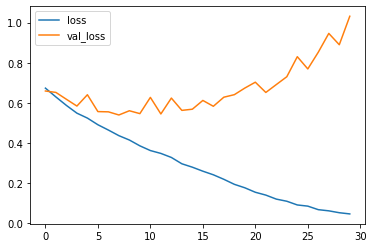

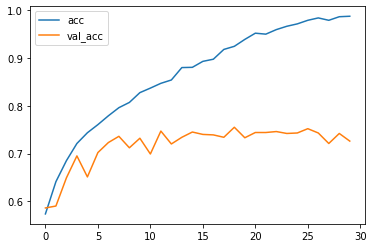

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

df_hist = pd.DataFrame(history.history)
df_hist[["loss", "val_loss"]].plot()
df_hist[["acc", "val_acc"]].plot()
plt.show()

### 데이터 증식 사용하기
기존 훈련 샘플로부터 더 많은 훈련 데이터를 생성하는 방법  
1보다 작은 소수 입력시 비율, 정수 입력시 (-n , +n), 1보다 큰 소수 입력시 (-f, +f]

In [101]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

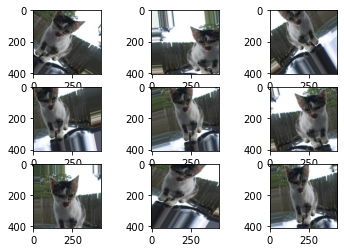

In [102]:
from tensorflow.keras.preprocessing import image
from numpy import expand_dims

img = image.load_img('../dogs_vs_cats/cats_and_dogs_small/train/cats/cat.11.jpg')
data = image.img_to_array(img)
samples = expand_dims(data, 0)

it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

#### 데이터 증식(Data Augmentation)을 적용한 모델

In [75]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5)) # 오버피팅 방지를 위해 Dropout 층 추가
model.add(Dense(512, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
    loss = tf.keras.losses.binary_crossentropy,
    metrics=["acc"]
)

In [76]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode="binary")
validation_genrator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32, class_mode="binary")

with tf.device(":/GPU:0"):
    histoty = model.fit(train_generator, epochs=100, validation_data=validation_genrator)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
63/63 [==============================] - 28s 439ms/step - loss: 0.6929 - acc: 0.5235 - val_loss: 0.6991 - val_acc: 0.5000
Epoch 2/100
63/63 [==============================] - 29s 453ms/step - loss: 0.6868 - acc: 0.5330 - val_loss: 0.6685 - val_acc: 0.5770
Epoch 3/100
63/63 [==============================] - 28s 452ms/step - loss: 0.6769 - acc: 0.5605 - val_loss: 0.6573 - val_acc: 0.5980
Epoch 4/100
63/63 [==============================] - 28s 443ms/step - loss: 0.6718 - acc: 0.5805 - val_loss: 0.6862 - val_acc: 0.5270
Epoch 5/100
63/63 [==============================] - 27s 433ms/step - loss: 0.6634 - acc: 0.5980 - val_loss: 0.7082 - val_acc: 0.5200
Epoch 6/100
63/63 [==============================] - 27s 433ms/step - loss: 0.6585 - acc: 0.6025 - val_loss: 0.6230 - val_acc: 0.6430
Epoch 7/100
63/63 [==============================] - 28s 439ms/step - loss: 0.6425 - acc: 0.6260 - val_loss: 0.6

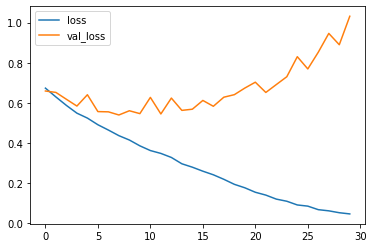

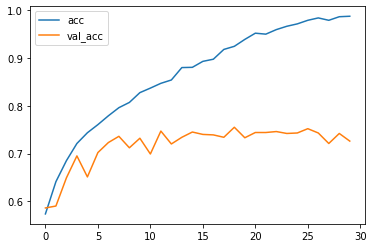

In [77]:
df_hist = pd.DataFrame(history.history)
df_hist[["loss", "val_loss"]].plot()
df_hist[["acc", "val_acc"]].plot()
plt.show()

## 사전 훈련된 컨브넷 사용
사전 훈련된 네트워크(pretrained network)는 일반적으로 대규모 이미지 분류 문제를 위해 대량의 데이터셋에서 미리 훈련되어 저장된 네트워크  
사전 훈련된 네트워크를 사용하는 두 가지 방법  
1. 특성 추출(feature extraction)
2. 미세 조정(fine tuning)

### 특성 추출(feature extraction)
사전에 학습된 네트워크의 표현을 사용하여 새로운 샘플에서 흥미로운 특성을 뽑아내는 것  
분류기 부분은 재사용을 하지 않음 -> FC에서 찾은 표현은 공간 개념을 제거하지만, 합성곱의 특성맵은 객체 위치를 고려하기 때문